# **Shapiro-Wilk Test (Normality Test)**

In many statistical tests (**t-tests**, **ANOVA**, **linear regression**) we assume that the data comes from a normal distribution. If this assumption is violated, the results of these tests might not be valid.

The **Shapiro-Wilk** test helps us to verify if the data meets this assumption, so we can decide wheter to proceed with parametric tests (**t-test** or **ANOVA**) or non-parametric (**Mann-Whitney U test**, **Kruskal-Wallis test**) but most of the case we don't need normarlity in non-parametric tests.

When not to use the **Shapiro-Wilk**:

> - If the dataset is large like more then 5000 values in **Shapiro-Wilk** test become too sensitive. minor deviations from normality lead to rejecting the null hypothesis even if the deviation is not practically significant. 
>
>- The **Shapiro-Wilk** test is only suitable for continuous numerical data. If the data is categorical (**gender**, **country**, **product type**), the normality test is not applicable.
>
>- If the data is highly skewed or has many outliers, it may violate the assumptions of the **Shapiro-Wilk** test, and the results might not be meaningful.

## Loading Libraries

In [28]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

Using Iris Plants Database in this test. The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

In [ ]:
data = pd.read_csv('Advanced-Statistical-Methods-for-AB-and-Hypothesis-Testing-Methods-of-Experimentations/datasets/IRIS.csv')

In [30]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Shapiro-Wilk Test

In [ ]:



numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

normality_results = {}

for column in numerical_columns:
    stat, p_value = stats.shapiro(data[column])
    normality_results[column] = {'Statistic': stat, 'p-value': p_value}

for column, result in normality_results.items():
    print(f"Column: {column}")
    print(f"Statistic: {result['Statistic']}, p-value: {result['p-value']}")
    if result['p-value'] < 0.05:
        print("The data is not normally distributed.\n")
    else:
        print("The data is normally distributed.\n")

Column: sepal_length
Statistic: 0.9760902723490532, p-value: 0.010181161454691156
The data is not normally distributed.

Column: sepal_width
Statistic: 0.9837916445014413, p-value: 0.07517918532015967
The data is normally distributed.

Column: petal_length
Statistic: 0.8764246351886722, p-value: 7.545419569615864e-10
The data is not normally distributed.

Column: petal_width
Statistic: 0.9026245656897675, p-value: 1.8647596517271003e-08
The data is not normally distributed.



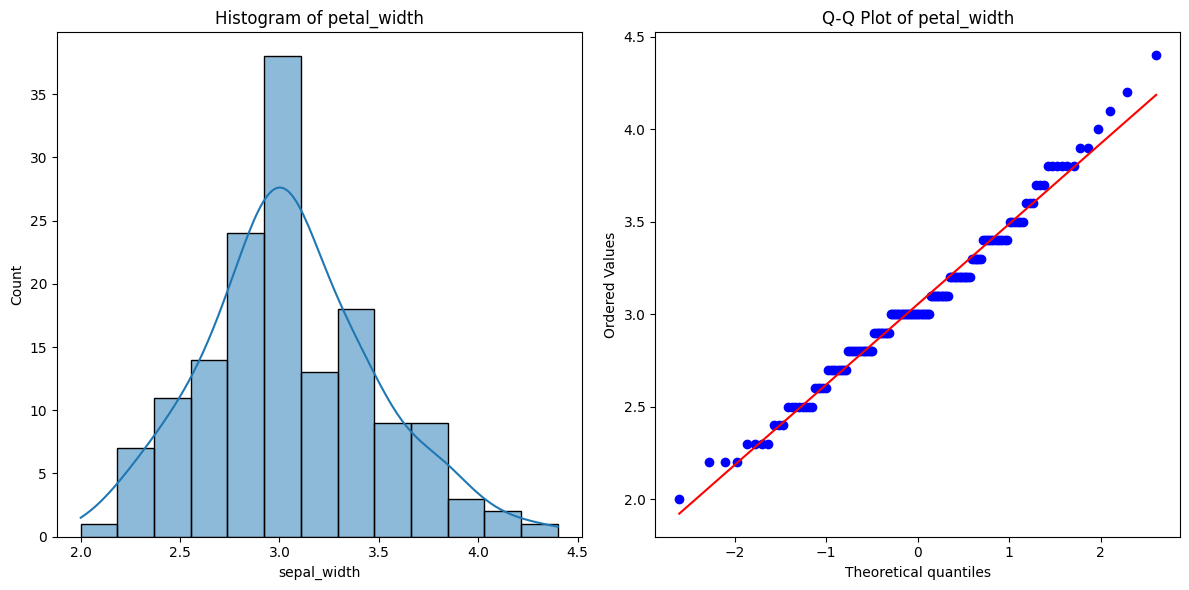

In [33]:
# Visualize histograms and Q-Q plots for each numerical column
plt.figure(figsize=(12, 6))
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['sepal_width'], kde=True)
plt.title(f"Histogram of {column}")

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(data['sepal_width'], dist="norm", plot=plt)
plt.title(f"Q-Q Plot of {column}")

plt.tight_layout()
plt.show()


# Shapiro-Wilk Normality Test Results

1. Sepal Length: p-value = 0.0102 (not normally distributed, reject null hypothesis).

2. Sepal Width: p-value = 0.0752 (normally distributed, fail to reject null hypothesis).

3. Petal Length: p-value = 7.545419569615864e-10 (not normally distributed, reject null hypothesis).

4. Petal Width: p-value = 1.8647596517271003e-08 (not normally, reject null hypothesis).

- Sepal Width is normally distributed, so parametric tests can be used.
- Sepal Length, Petal Length, and Petal Width are not normally distributed. Here we have to use non-parametric tests or applying data transformation for these columns.